In [7]:
import numpy as np
import scipy.io as spio
from scipy.integrate import solve_ivp
##%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rcParams['font.size'] = 18
rc('font', family='sans-serif')
rcParams['font.family'] = 'Serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
# changed to False because I am not using LaTex
rcParams['text.usetex'] = False

#new change

In [8]:
#maximal conductances in mS/cm^2
gL = 0.1; #leak

#reversal potential (in mV)
VL = 0;

#conductance coupling coefficient between soma and dendrite compartment 
#(in mS/cm^2)
gc = 1.85; 

#fraction of cable length assigned to soma (1-p for dendrite)
p = 0.5;

#capacitance uF/cm^2
Cm = 3;

gc_t = gc/p;
rho_c = gc_t/gL;

tau = Cm/gL; # in ms
tau1 = tau/(1 + 2*rho_c)

Is = 1; # in uA/cm^2
Is_t = Is/p;

t1 = 2.5
t2 = 22.5

# Stimulus current, this should be 10 instead of 10e-5, likely due to her implementation
def Istim(t):
    if t>t1 and t<t2:
        Istim = 10
    else:
        Istim=0
    return Istim



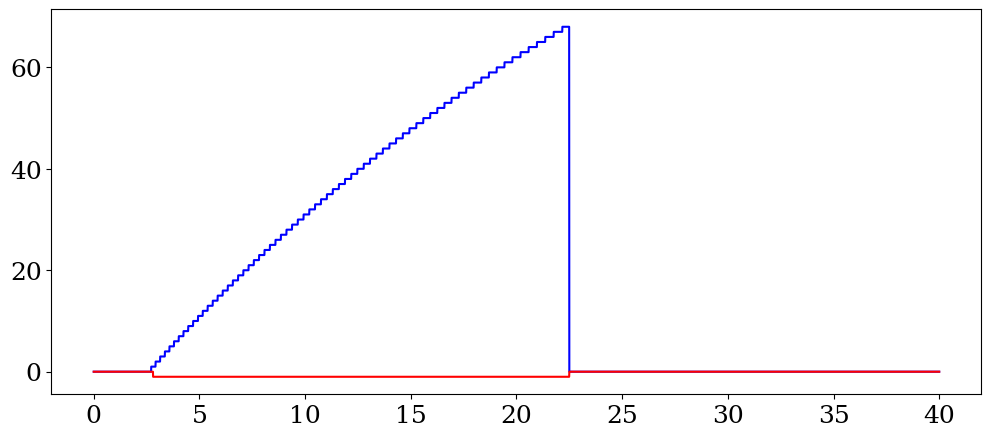

In [11]:
import math
def func_w1 (t, t1, t2): 
    if t<t1:
        return 0
    elif t>=t1 and t<=t2:
        return Istim(t)*Is_t/(math.sqrt(2)*gL)*(1-math.e**((t1-t)/tau))
    else:
        return Istim(t)*Is_t/(math.sqrt(2)*gL)*((math.e**((t2-t)/tau))-math.e**((t1-t)/tau))

def func_w2 (t, t1, t2): 
    if t<t1:
        return 0
    elif t>=t1 and t<=t2:
        return Istim(t)*(-Is_t)/(math.sqrt(2)*gL*(1 + 2*rho_c))*(1-math.e**((t1-t)/tau1))
    else:
        return Istim(t)*(-Is_t)/(math.sqrt(2)*gL*(1 + 2*rho_c))*((math.e**((t2-t)/tau1))-math.e**((t1-t)/tau1))

vfunc_w1 = np.vectorize(func_w1)
vfunc_w2 = np.vectorize(func_w2)

t = np.linspace(0, 40, 5000)    
y_w1 = vfunc_w1(t, t1, t2)
y_w2 = vfunc_w2(t, t1, t2)

#display results
fig1 = plt.figure(figsize=(12,5))
plt.plot(t, y_w1, c='b', label='w1_analytical')
plt.plot(t, y_w2, c='r', label='w2_analytical')
plt.show()